## Run an experiment using the mobility network

In [24]:
# to allow relative imports
import os
import sys

module = os.path.abspath(os.path.join('..'))
if module not in sys.path:
    sys.path.append(module)

from data_processing.data_paths import GRAPHS
GRAPHS = os.path.join(module, 'data_processing', GRAPHS)

In [45]:
from model.network.mobility_network import MNGeneratorFromFile
from model.compartmental_model.seir import MonitoredSEIR
from experiments.runner import ExperimentRunner
from epydemic import Monitor, SEIR, StochasticDynamics, ERNetwork
from networkx import read_graphml
import numpy as np

In [82]:
params = dict()

# params[MNGeneratorFromFile.PATH] = f'{GRAPHS}post_N_10000.graphml'
# use an ER network as the substrate
# params[ERNetwork.N] = N = 10000
# params[ERNetwork.KMEAN] = k_mean = 100

T = 5000

# set the parameters the same as above
params[SEIR.P_EXPOSED] = p_exposed = 0.05
params[SEIR.P_SYMPTOMS] = p_symptoms = 0.002
params[SEIR.P_REMOVE] = 0.001
params[SEIR.P_INFECT_ASYMPTOMATIC] = 0.001
params[SEIR.P_INFECT_SYMPTOMATIC] = 0.001

params[Monitor.DELTA] = T / 100

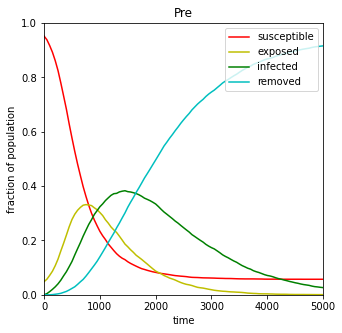

In [83]:
g = read_graphml(f'{GRAPHS}post_N_10000_k_10.graphml')
e = StochasticDynamics(MonitoredSEIR(), g=g)
compartments = {
    SEIR.SUSCEPTIBLE: 'susceptible',
    SEIR.EXPOSED: 'exposed',
    SEIR.INFECTED: 'infected',
    SEIR.REMOVED: 'removed'
}

er = ExperimentRunner(e, g.order())
er.run(params, T=T)
er.plot('Pre', compartments)

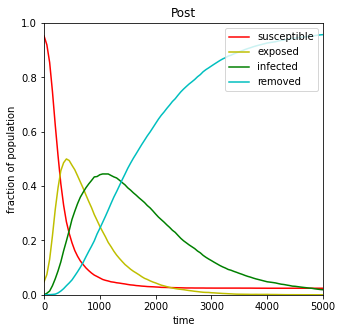

In [84]:
g = read_graphml(f'{GRAPHS}pre_N_10000_k_10.graphml')
e = StochasticDynamics(MonitoredSEIR(), g=g)
compartments = {
    SEIR.SUSCEPTIBLE: 'susceptible',
    SEIR.EXPOSED: 'exposed',
    SEIR.INFECTED: 'infected',
    SEIR.REMOVED: 'removed'
}

er = ExperimentRunner(e, g.order())
er.run(params, T=T)
er.plot('Post', compartments)

In [85]:
# g = ERNetwork()._generate(params=params)

degrees = list(dict(g.degree).values())
k_mean = np.mean(degrees)
k_var = np.var(degrees)

T = 2.5 * (k_mean / (k_var - k_mean))
print(k_mean, k_var, T)


11.270994990668893 97.0752700933842 0.3283925823385989
